In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('data/car_prices.csv', on_bad_lines='skip')

In [3]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


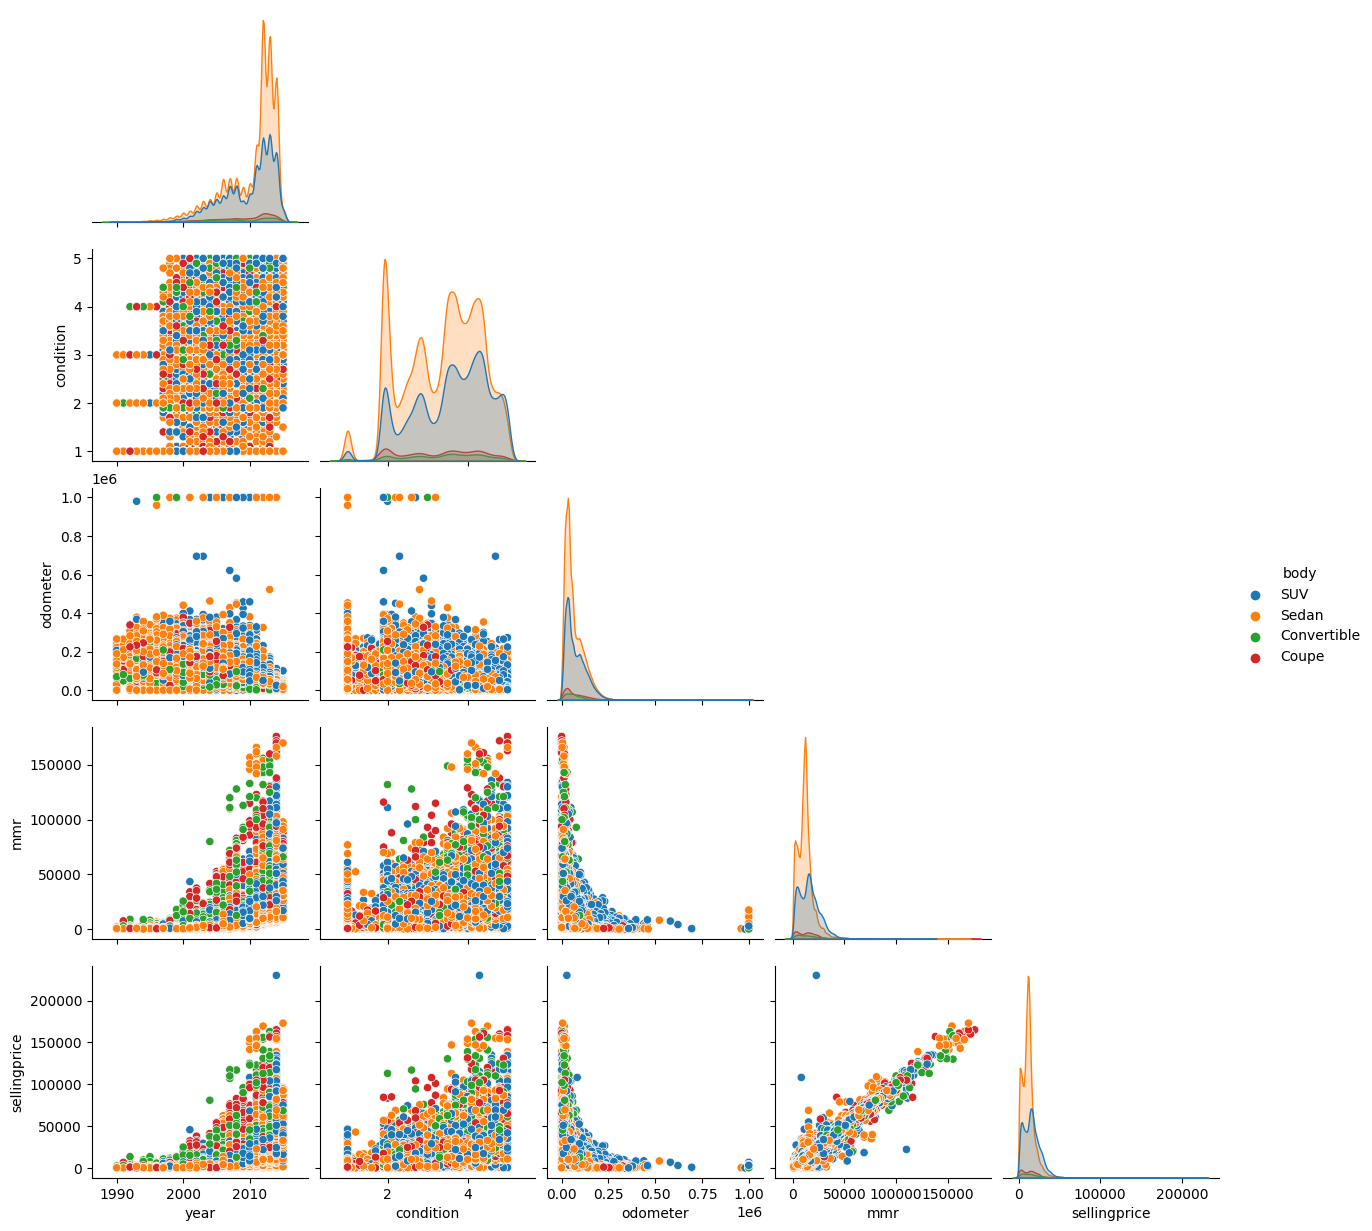

In [5]:
style_list = ['SUV', 'Sedan', 'Convertible', 'Coupe']

sns.pairplot(
    cars.query('body in @style_list'),
    corner=True,
    hue='body'
)

<AxesSubplot:>

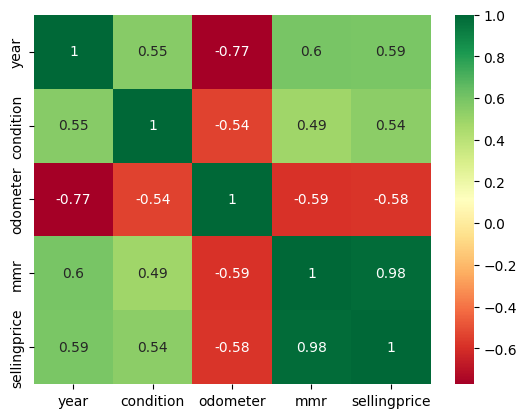

In [6]:
sns.heatmap(
    cars.corr(),
    cmap = 'RdYlGn',
    annot=True
)

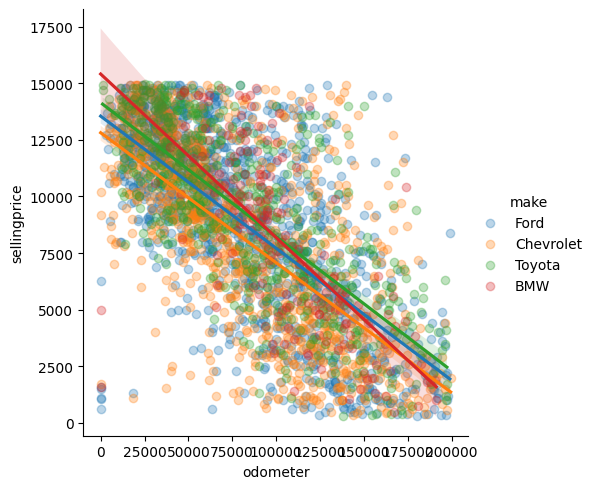

In [9]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

sns.lmplot(
    x = 'odometer',
    y = 'sellingprice',
    data = cars.query('make in @brand_list and sellingprice < 15000 and odometer < 200_000').sample(3000),
    hue = 'make',
    scatter_kws=({'alpha': 0.3})
)

In [10]:
import scipy.stats as stats

cars_reg = cars.dropna()

stats.linregress(x = cars_reg['odometer'], y = cars_reg['sellingprice'])

LinregressResult(slope=-0.10686305954841516, intercept=20818.28408595647, rvalue=-0.5773849819198604, pvalue=0.0, stderr=0.00021987650761310986, intercept_stderr=18.58796228286367)

In [12]:
for brand in brand_list:
    data = cars_reg.loc[cars_reg['make'] == brand]
    print(f"{brand}: {stats.linregress(data['odometer'], data['sellingprice'])[0:2]}")

Ford: (-0.09953734771818873, 20840.011075886512)
BMW: (-0.2225033042967633, 35567.979744684795)
Toyota: (-0.07594777614361674, 17813.017107685304)
Chevrolet: (-0.08841045962774952, 18705.587357485056)
